# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install pyarrow

## Import Statements

In [322]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [323]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [324]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

## Data Exploration of Median Household Income

In [433]:
df_hh_income

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,0
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [325]:
df_hh_income.shape

(29322, 3)

In [326]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [327]:
df_hh_income.isna().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [328]:
df_hh_income.duplicated().values.any()

False

## Data Exploration of Percentage of People Below Poverty level

In [434]:
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.80
1,AL,Abbeville city,29.10
2,AL,Adamsville city,25.50
3,AL,Addison town,30.70
4,AL,Akron town,42.00
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.60
29325,WY,Worland city,15.30
29326,WY,Wright town,5.90
29327,WY,Yoder town,5.40


In [329]:
df_pct_poverty.shape

(29329, 3)

In [330]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [331]:
df_pct_poverty.isna().values.any()

False

In [332]:
df_pct_poverty.duplicated().values.any()

False

## Data Exploration of Percentage of People Over 25 Completed High School

In [435]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.20
1,AL,Abbeville city,69.10
2,AL,Adamsville city,78.90
3,AL,Addison town,81.40
4,AL,Akron town,68.60
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100.00
29325,WY,Worland city,85.60
29326,WY,Wright town,89.20
29327,WY,Yoder town,79.40


In [333]:
df_pct_completed_hs.shape

(29329, 3)

In [334]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [335]:
df_pct_completed_hs.isna().values.any()

False

In [336]:
df_pct_completed_hs.duplicated().values.any()

False

## Data Exploration of Share of Race by City

In [436]:
df_share_race_city

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,67.20,30.20,0.00,0.00,1.60
1,AL,54.40,41.40,0.10,1.00,3.10
2,AL,52.30,44.90,0.50,0.30,2.30
3,AL,99.10,0.10,0.00,0.10,0.40
4,AL,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...
29263,WY,95.90,0.00,0.00,2.10,0.00
29264,WY,89.90,0.30,1.30,0.60,16.60
29265,WY,94.50,0.10,1.40,0.20,6.20
29266,WY,97.40,0.00,0.00,0.00,4.00


In [337]:
df_share_race_city.shape

(29268, 7)

In [338]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [339]:
df_share_race_city.isna().values.any()

False

In [340]:
df_share_race_city.duplicated().values.any()

False

## Data Exploration of Deaths by Police

In [341]:
df_fatalities.shape

(2535, 14)

In [342]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [343]:
df_fatalities.isna().values.any()

True

In [344]:
df_fatalities.duplicated().values.any()

False

In [345]:
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [346]:
df_fatalities.fillna(0, inplace=True)

In [347]:
df_hh_income.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [348]:
# There are several "=" characters in the column. Replace them with "0" so that type conversion of column to float be acheived. 
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(str).str.replace('-', "0")

In [349]:
# Convert the column type to float
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)

In [350]:
poverty_rate = df_pct_poverty.groupby('Geographic Area', as_index=False)['poverty_rate'].mean()
poverty_rate = poverty_rate.sort_values('poverty_rate', ascending=False)

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



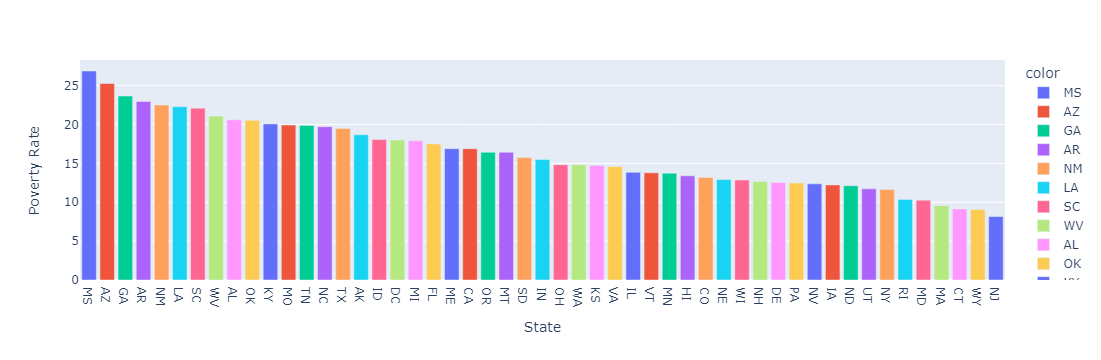

In [351]:
fig = px.bar(x=poverty_rate['Geographic Area'], y=poverty_rate['poverty_rate'], 
							hover_name=poverty_rate['poverty_rate'], color=poverty_rate['Geographic Area'],
							color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='State', yaxis_title='Poverty Rate', 
									coloraxis_showscale=False)
fig.update_traces(hovertemplate='State: %{x} <br>Poverty Rate: %{y}')
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [352]:
# There are several "=" characters in the column. Replace them with "0" so that type conversion of column to float be acheived. 
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(str).str.replace('-', "0")

In [353]:
# Convert the columns type to float
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)

In [354]:
graduation_rate = df_pct_completed_hs.groupby('Geographic Area', as_index=False)['percent_completed_hs'].mean()
graduation_rate = graduation_rate.sort_values('percent_completed_hs', ascending=False)
graduation_rate['percent_completed_hs'] = round(graduation_rate['percent_completed_hs'], 2)

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



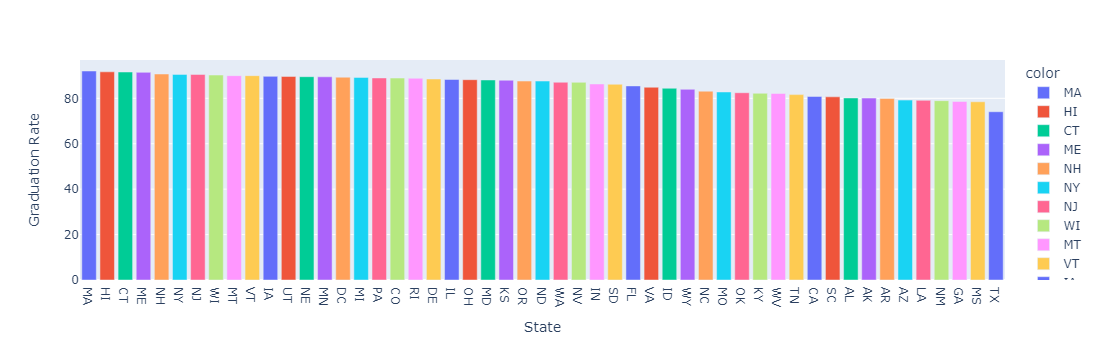

In [355]:
fig = px.bar(x=graduation_rate['Geographic Area'], y=graduation_rate['percent_completed_hs'], 
							hover_name=graduation_rate['percent_completed_hs'], color=graduation_rate['Geographic Area'],
							color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='State', yaxis_title='Graduation Rate', 
									coloraxis_showscale=False)
fig.update_traces(hovertemplate='State: %{x} <br>Graduation Rate: %{y}')
fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [356]:
graduation_rate = graduation_rate.sort_values('Geographic Area')

In [ ]:
poverty_rate = poverty_rate.sort_values('Geographic Area')
poverty_rate

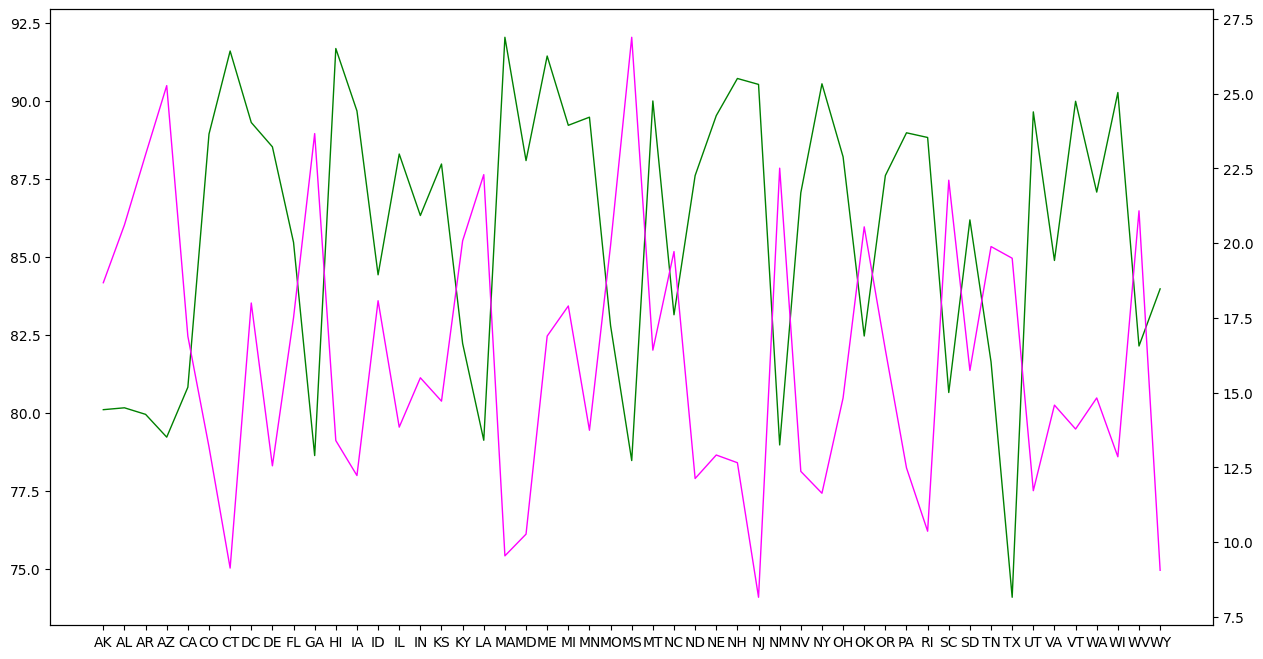

In [358]:
plt.figure(figsize=(15,8), dpi=100)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(graduation_rate['Geographic Area'], graduation_rate['percent_completed_hs'], color='g', linewidth=1)
ax2.plot(poverty_rate['Geographic Area'], poverty_rate['poverty_rate'], color='fuchsia', linewidth=1)
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:
sns.jointplot(x=poverty_rate['poverty_rate'], y=graduation_rate['percent_completed_hs'], kind='kde')

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
ax = sns.scatterplot(x=poverty_rate['Geographic Area'], 
                     y=poverty_rate['poverty_rate'])

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
ax = sns.scatterplot(x=graduation_rate['Geographic Area'], 
                     y=graduation_rate['percent_completed_hs'])

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [ ]:
%pip install statsmodels

In [ ]:
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=graduation_rate, x='Geographic Area', y='percent_completed_hs', lowess=False, 
                   scatter_kws = {'alpha': 0.3}, line_kws = {'color': 'black'})
ax.set(xlabel='State', ylabel='High School Graduation Ratio')

In [ ]:
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=poverty_rate, x='Geographic Area', y='poverty_rate', lowess=False, 
                   scatter_kws = {'alpha': 0.3}, line_kws = {'color': 'black'})
ax.set(xlabel='State', ylabel='Poverty Ratio')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [362]:
# Replace the '(X)' with '0' so that type conversion to float could be acheived
df_share_race_city['share_black'] = df_share_race_city['share_black'].astype(str).str.replace('(X)', "0")
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].astype(str).str.replace('(X)', "0")
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].astype(str).str.replace('(X)', "0")
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].astype(str).str.replace('(X)', "0")
df_share_race_city['share_white'] = df_share_race_city['share_white'].astype(str).str.replace('(X)', "0")

In [363]:
# Change the datatype to float
df_share_race_city[['share_white','share_black','share_native_american','share_asian', 'share_hispanic']] = \
df_share_race_city[['share_white','share_black','share_native_american','share_asian', 'share_hispanic']].astype(float)

In [364]:
# Drop the city column as this is not required
df_share_race_city = df_share_race_city.drop(columns=['City'])

In [365]:
racial_makeup = df_share_race_city.groupby('Geographic area', as_index=False).mean()

In [366]:
df = racial_makeup.melt(id_vars=['Geographic area'], var_name='Race', value_name='Mean Value' )

In [367]:
df

,Geographic area,Race,Mean Value
0,AK,share_white,45.26
1,AL,share_white,72.51
2,AR,share_white,78.45
3,AZ,share_white,59.93
4,CA,share_white,71.54
...,...,...,...
250,VT,share_hispanic,1.38
251,WA,share_hispanic,10.61
252,WI,share_hispanic,3.32
253,WV,share_hispanic,0.90


C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



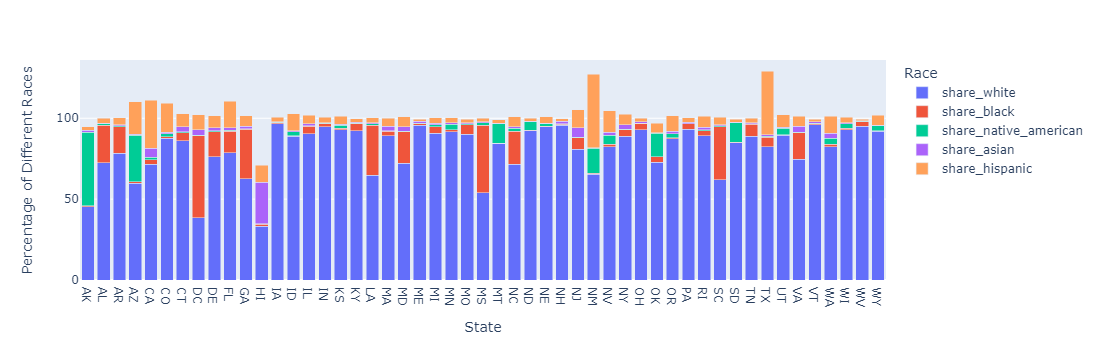

In [368]:
fig = px.bar(df, x='Geographic area', y='Mean Value', 
							hover_name=df['Geographic area'], color=df['Race'],
							color_continuous_scale='Agsunset', barmode='stack')
fig.update_layout(xaxis_title='State', yaxis_title='Percentage of Different Races', 
									coloraxis_showscale=False)
fig.update_traces(hovertemplate='State: %{x} <br>% of Races: %{y}')
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [371]:
killed_by_race = df_fatalities['race'].loc[(df_fatalities['race'] != 0)  & (df_fatalities['race'] != 'O')]

In [372]:
count = killed_by_race.value_counts()

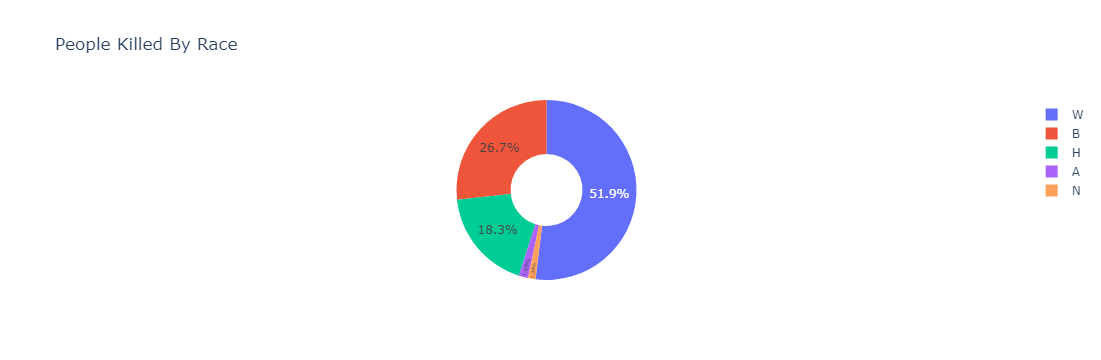

In [373]:
fig = px.pie(labels=count.index, values=count.values, 
title="People Killed By Race", names=count.index, hole=0.4)
fig.update_traces(textposition='inside', textinfo='percent', hovertemplate="Race: %{label} <br>People Killed: %{value} </br>")
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [374]:
killed_by_gender = df_fatalities['gender']

In [375]:
count = killed_by_gender.value_counts()

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



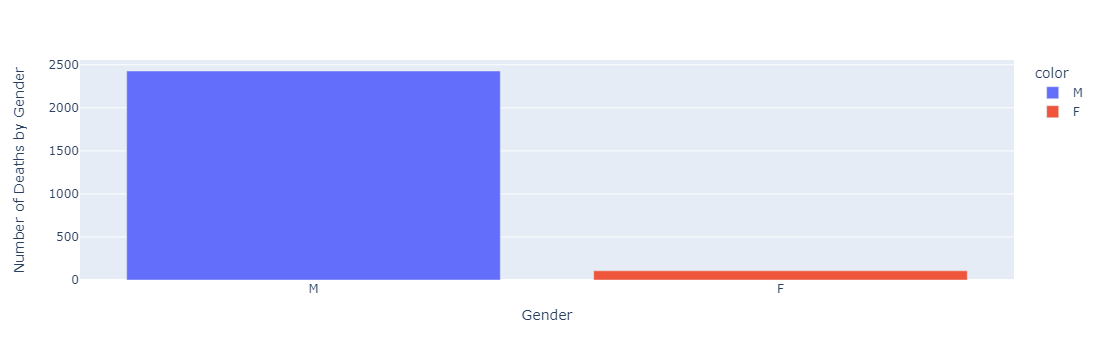

In [376]:
fig = px.bar(x=count.index, y=count.values, 
							hover_name=count.values, color=count.index,
							color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='Gender', yaxis_title='Number of Deaths by Gender', 
									coloraxis_showscale=False)
fig.update_traces(hovertemplate='Gender: %{x} <br>Nr of Deaths: %{y}')
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [378]:
# Remove 0 values from age column
df_fatalities_nz = df_fatalities.loc[df_fatalities['age'] != 0]

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



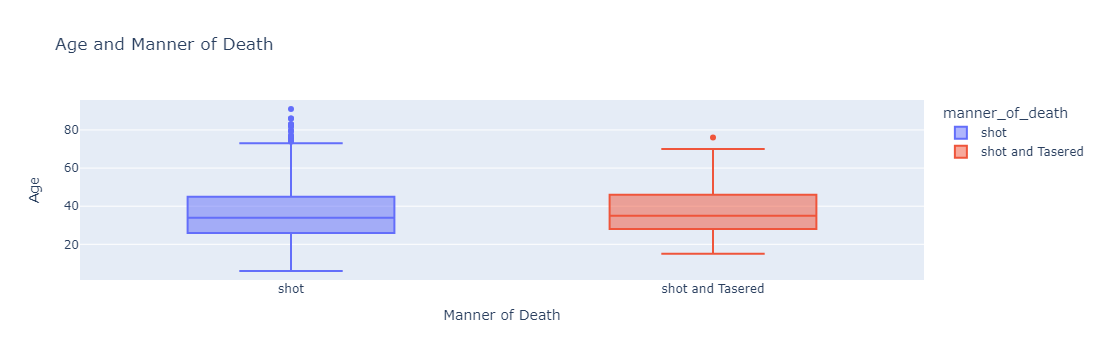

In [379]:
box = px.box(df_fatalities_nz, x='manner_of_death', y='age', color="manner_of_death", title="Age and Manner of Death")
box.update_layout(xaxis_title='Manner of Death',
                  yaxis_title='Age')
box.show()

In [380]:
df = df_fatalities[['manner_of_death', 'gender']]
df.groupby(['manner_of_death', 'gender'])['gender'].count()

manner_of_death   gender
shot              F          102
                  M         2261
shot and Tasered  F            5
                  M          167
Name: gender, dtype: int64

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [381]:
people_killed = df_fatalities['armed'].count()
unarmed_number = df_fatalities['armed'].loc[df_fatalities['armed'] == 'unarmed'].count()
armed_number = df_fatalities['armed'].loc[df_fatalities['armed'] != 'unarmed'].count()

In [385]:
perc = round(armed_number/people_killed, 2) * 100
print("Percentage of Armed People Killed by Police: ", perc)

Percentage of Armed People Killed by Police:  93.0


In [382]:
armed_df = df_fatalities.loc[(df_fatalities['armed'] != 'unarmed') & (df_fatalities['armed'] != 0)]

In [383]:
weapon = armed_df.groupby('armed')['armed'].count()

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



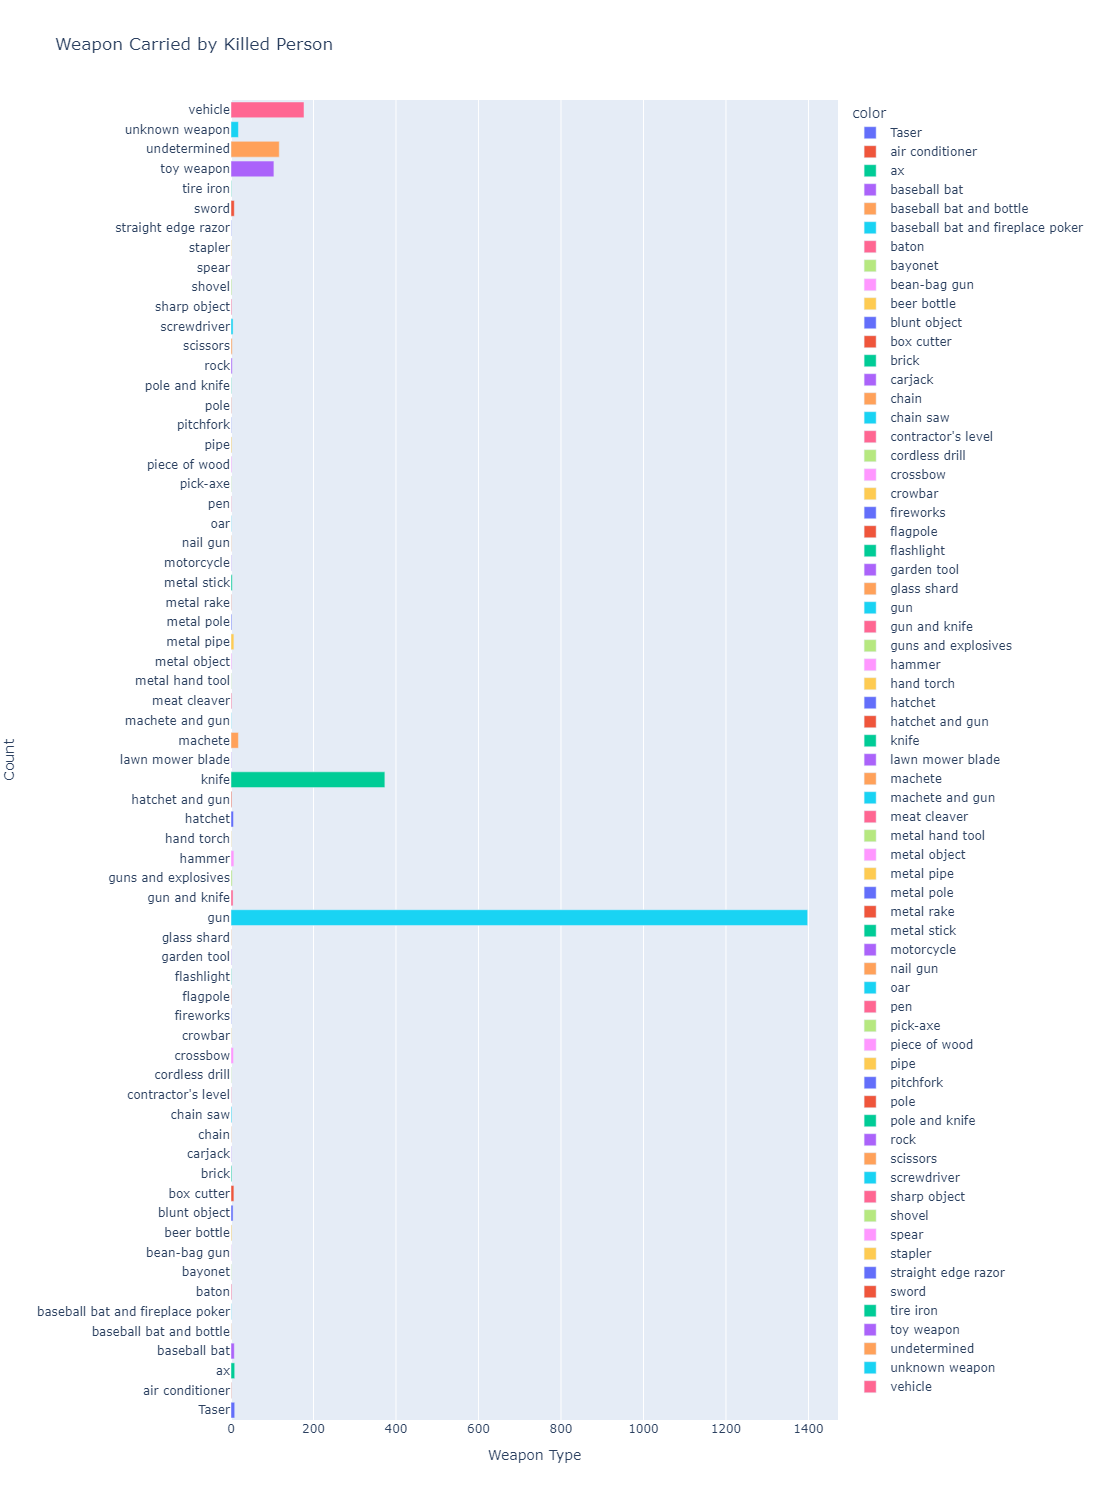

In [384]:
h_bar = px.bar(x=weapon.values,
               y=weapon.index,
               orientation='h',
               color=weapon.index,
               color_continuous_scale='Viridis',
               title='Weapon Carried by Killed Person')
 
h_bar.update_layout(xaxis_title='Weapon Type', 
                    yaxis_title='Count', width=1000, height=1500,
                    coloraxis_showscale=False)
h_bar.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [386]:
total_killed = df_fatalities['age'].count()
under_25 = df_fatalities['age'].loc[df_fatalities['age'] < 25].count()
per_under_25 = round((under_25/total_killed) * 100 , 2)
per_under_25

20.79

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [387]:
# Remove 0 values from age column
df_fatalities_nz = df_fatalities.loc[df_fatalities['age'] != 0]

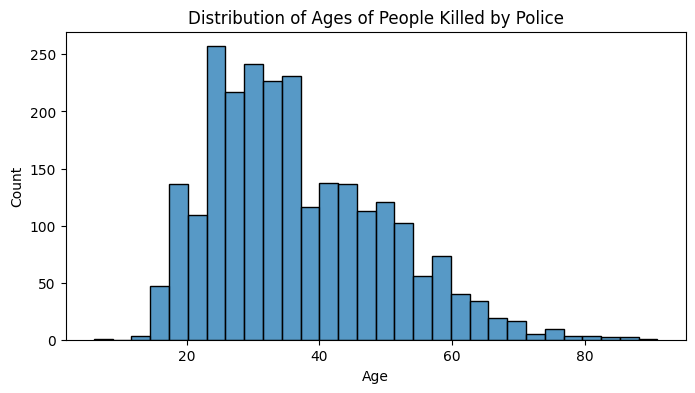

In [388]:
plt.figure(figsize=(8, 4), dpi=100)
sns.histplot(data=df_fatalities_nz, x="age", bins=30)
plt.xlabel('Age')
plt.title('Distribution of Ages of People Killed by Police')
plt.show()

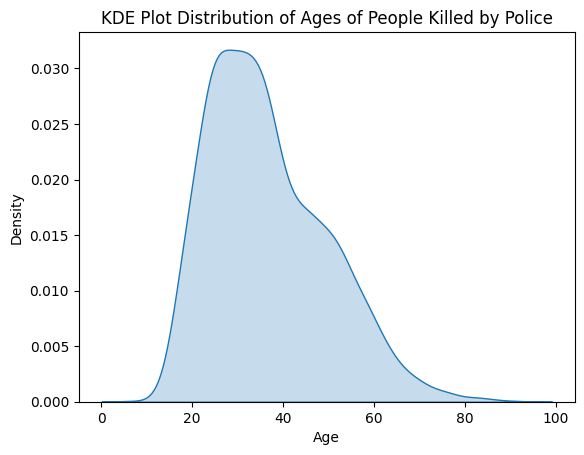

In [389]:
sns.kdeplot(data=df_fatalities_nz, x="age", clip=(0,100),fill=True)
plt.xlabel('Age')
plt.title('KDE Plot Distribution of Ages of People Killed by Police')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [390]:
race_A = df_fatalities_nz.loc[df_fatalities_nz['race'] == 'A'] # Asian Race
race_W = df_fatalities_nz.loc[df_fatalities_nz['race'] == 'W'] # White Race
race_H = df_fatalities_nz.loc[df_fatalities_nz['race'] == 'H'] # Hispanic Race
race_B = df_fatalities_nz.loc[df_fatalities_nz['race'] == 'B'] # Black Race
race_N = df_fatalities_nz.loc[df_fatalities_nz['race'] == 'N'] # Native American Race

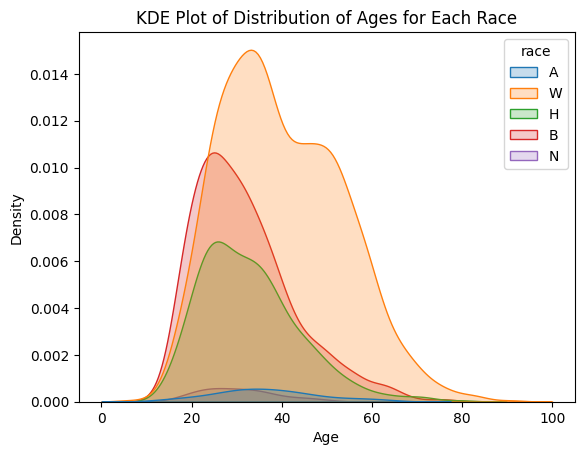

In [391]:
age_race_df= df_fatalities_nz.loc[(df_fatalities_nz['race'] != 'O') & (df_fatalities_nz['race'] != 0)]
sns.kdeplot(data=age_race_df, x="age", clip=(0,100),fill=True, hue="race")
plt.xlabel('Age')
plt.title('KDE Plot of Distribution of Ages for Each Race')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [394]:
age_race_df = age_race_df.groupby('race', as_index=False)['id'].count()

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



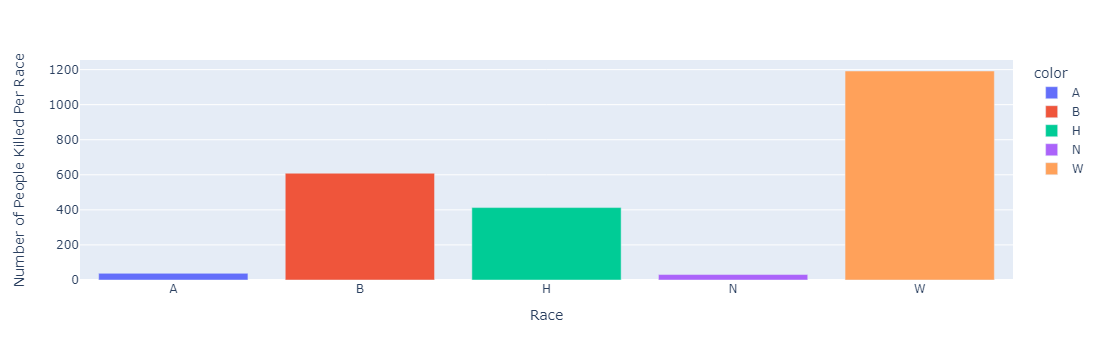

In [395]:
fig = px.bar(x=age_race_df['race'], y=age_race_df['id'], 
							hover_name=age_race_df['race'], color=age_race_df['race'],
							color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='Race', yaxis_title='Number of People Killed Per Race', 
									coloraxis_showscale=False)
fig.update_traces(hovertemplate='Race: %{x} <br>Nr of People Killed: %{y}')
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [396]:
total_killed = df_fatalities['signs_of_mental_illness'].count()
mentally_ill = df_fatalities['signs_of_mental_illness'][df_fatalities['signs_of_mental_illness'] == True].count()

In [397]:
per_mentally_ill_killed = round((mentally_ill/total_killed) * 100 ,1)
print("Percentage of Peopled Killed by Police with Mental Illness: ", per_mentally_ill_killed)

Percentage of Peopled Killed by Police with Mental Illness:  25.0


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [398]:
city_df = df_fatalities.groupby('city', as_index=False)['id'].count()
top10_cities = city_df.sort_values('id', ascending=False)[:10]

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



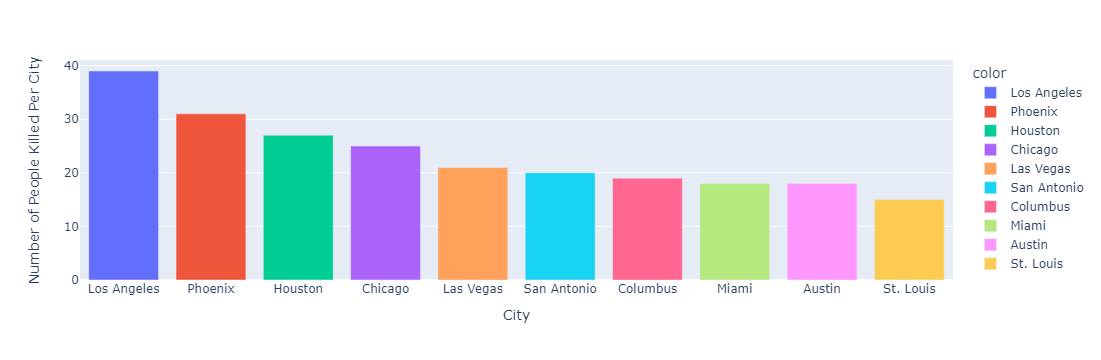

In [399]:
fig = px.bar(x=top10_cities['city'], y=top10_cities['id'], 
							hover_name=top10_cities['city'], color=top10_cities['city'],
							color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='City', yaxis_title='Number of People Killed Per City', 
									coloraxis_showscale=False)
fig.update_traces(hovertemplate='City: %{x} <br>Nr of People Killed: %{y}')
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [411]:
df_fatalities['signs_of_mental_illness'].value_counts(normalize=True)

signs_of_mental_illness
False   0.75
True    0.25
Name: proportion, dtype: float64

In [404]:
race_share = df_fatalities.groupby(['city','race'], as_index=False)['id'].count().sort_values('id', ascending=False)

In [406]:
race_share.loc[race_share['city'] == 'Los Angeles']

,city,race,id
921,Los Angeles,H,19
920,Los Angeles,B,10
922,Los Angeles,W,6
918,Los Angeles,0,3
919,Los Angeles,A,1


In [284]:
city_race_df = df_fatalities.groupby(['city','race'], as_index=False)['id'].count()
top10_cities_race = city_df.sort_values('id', ascending=False)[:10]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [321]:
city_race_df

NameError: name 'city_race_df' is not defined

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [400]:
killing_by_state = df_fatalities.groupby('state', as_index=False)['id'].count()

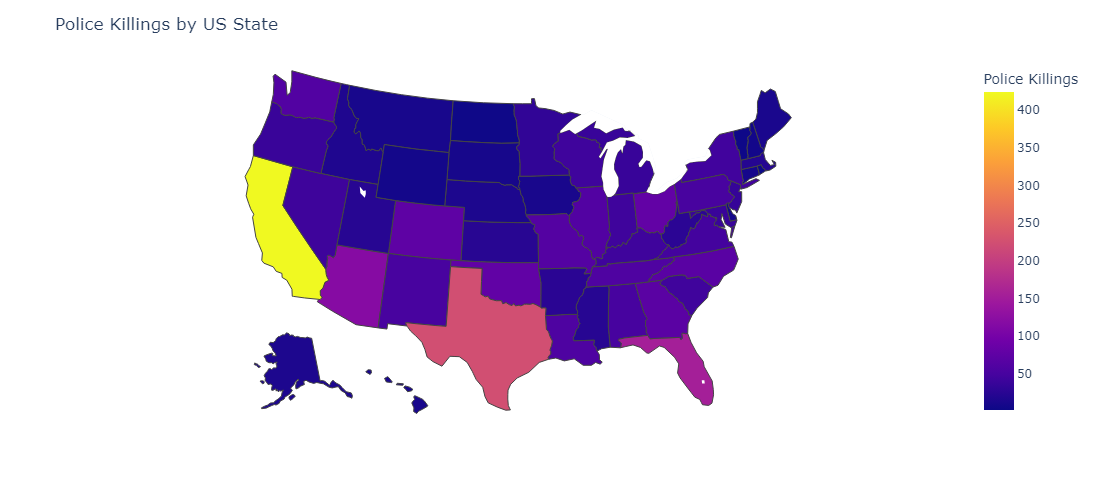

In [402]:
fig = px.choropleth(locations=killing_by_state['state'].values, locationmode="USA-states", color=killing_by_state['id'].values, scope="usa",
                   labels={'color':'Police Killings', 'locations':'State'})
fig.update_layout(title= "Police Killings by US State", coloraxis_showscale=True, width=800, height=500)
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [276]:
df = df_fatalities.groupby('date', as_index=False)['id'].count()
df['date'] = pd.to_datetime(df['date'], format='mixed')
killing_overtime = df.sort_values('date')

In [286]:
killing_overtime['Month'] = killing_overtime['date'].dt.month

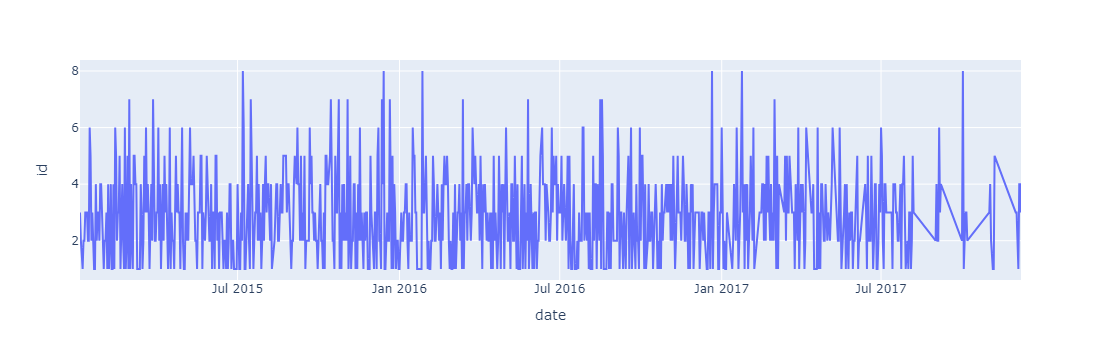

In [293]:
px.line(killing_overtime, x='date', y='id')

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).